# python libs

In [1]:
import gluoncv as gcv
import mxnet as mx
# mxnet NDarray 
from mxnet import nd

# MXNet Gluon Neural network layers.
from mxnet.gluon import nn

# optional for displaying the image
import matplotlib.pyplot as plt
import numpy as np
import os
import math
# pip install pillow but import PIL
#from PIL import Image

# Load image and convert to grayscale

nd_array_f3201_HWC3.shape =  (427, 640, 3)
nd_array_f3201_HWC1.shape =  (427, 640, 1)


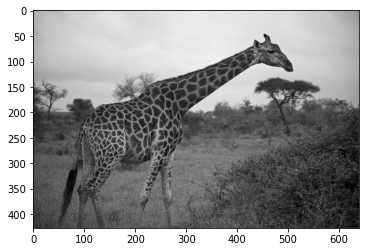

In [2]:
a_file_name = '0.jpg'
nd_array_uint8_HWC3 = mx.image.imread(a_file_name, flag=1)
np_array = nd_array_uint8_HWC3.asnumpy()
gray_aug = mx.image.RandomGrayAug(p=1)
nd_array_f32_HWC3 = nd_array_uint8_HWC3.astype("float32")
nd_array_f3201_HWC3 = nd_array_f32_HWC3/255
aug = mx.image.RandomGrayAug(p=1)
nd_array_f3201_HWC3 = aug(nd_array_f3201_HWC3)
print('nd_array_f3201_HWC3.shape = ', nd_array_f3201_HWC3.shape)
gray_np_array_f3201_HWC3 = nd_array_f3201_HWC3.asnumpy()
#nd_array_f3201_HWC1 = nd_array_f3201_HWC3[:,:,0]  # this makes a shape like (y,x)
nd_array_f3201_HWC1 = nd_array_f3201_HWC3.slice(begin=(0,0,0), end=(428,641,1))  # this give (y,x,1)
print('nd_array_f3201_HWC1.shape = ', nd_array_f3201_HWC1.shape)
gray_np_array_f3201_HWC1 = nd_array_f3201_HWC1.asnumpy()
plt.imshow(gray_np_array_f3201_HWC1, cmap='gray')

# rotate

From this source

https://en.wikipedia.org/wiki/Rotation_matrix


\begin{vmatrix}
\cos(\theta) & -\sin(\theta) \\
\sin(\theta) & \cos(\theta)
\end{vmatrix}


rotates points in the xy plane counterclockwise through an angle θ with respect to the positive x axis about the origin of a two-dimensional Cartesian coordinate system. To perform the rotation on a plane point with standard coordinates v = (x, y), it should be written as a column vector, and multiplied by the matrix R:


\begin{align}
\begin{vmatrix}
\cos(\theta) & -\sin(\theta) \\
\sin(\theta) & \cos(\theta)
\end{vmatrix}
\begin{vmatrix} x \\ y \end{vmatrix} = 
\begin{vmatrix}
x \cos(\theta) - y \sin(\theta) \\
x \sin(\theta) + y \cos(\theta)
\end{vmatrix}
\end{align}


In [3]:
def build_rot_matrix(angle):
    #  a  b
    #  c  d
    
    # calculate terms
    a = math.cos(x)
    b = -math.sin(x)
    c = math.sin(x)
    d = math.cos(x)

    # print("a = ", a)
    # print("b = ", b)
    # print("c = ", c)
    # print("d = ", d)
    
    # build np array
    np_array = np.array([
        [a,b],
        [c,d]
    ])
    
    # build mx.nd array
    nd_array = mx.nd.array(np_array)
    
    return nd_array

In [4]:
x=0.5*math.pi

rotate_90 = build_rot_matrix(x)
print('rotate by 90 nd array is ', rotate_90)

rotate by 90 nd array is  
[[ 6.123234e-17 -1.000000e+00]
 [ 1.000000e+00  6.123234e-17]]
<NDArray 2x2 @cpu(0)>


In [5]:
print("image shape = ", nd_array_f3201_HWC1.shape)
print("image shape = ", nd_array_f3201_HWC1.shape)
#print("image = ", nd_array_f3201_HWC1)
#gray_np_array_f3201_HWC1 = nd_array_f3201_HWC1.asnumpy()
#plt.imshow(gray_np_array_f3201_HWC1, cmap='gray')

image shape =  (427, 640, 1)
image shape =  (427, 640, 1)


In [6]:
print('rotate shape = ', rotate_90.shape)
# add a dimension
#rotate_90_221 = rotate_90.reshape(2,2,1)
#ndarray.stack([a, a]).T
rotate_90_221=nd.expand_dims(rotate_90, axis=0)
print('rotate shape = ', rotate_90_221.shape)
print('rotate = ', rotate_90_221)



rotate shape =  (2, 2)
rotate shape =  (1, 2, 2)
rotate =  
[[[ 6.123234e-17 -1.000000e+00]
  [ 1.000000e+00  6.123234e-17]]]
<NDArray 1x2x2 @cpu(0)>


In [7]:
# chance from HWC order to CHW order
nd_array_f3201_C1HW = nd.transpose(nd_array_f3201_HWC1, axes=(2,0,1) )

In [8]:
nd_array_f3201_C1HW.shape

(1, 427, 640)

In [9]:
# I didn't know what I was doing.  I need to rethink this on a small scale.

In [10]:
# rotate_img = nd_array_f3201_C1HW * rotate_90_221

# Reattempt of rotation with small image

This image is already grayscale so the augmentation step is skipped.

Also, I am trying to rotate a grayscale image.  As a result, I am removing the channel dimension.  FWIW, I am using grayscale so that I can learn how to do mxnet.  Later, I will try to rotate a color image. 

nd_array_uint8_HWC1.shape =  (480, 640, 1)
nd_array_f3201_HWC1.shape =  (480, 640, 1)
nd_array_f3201_HW.shape =  (480, 640)


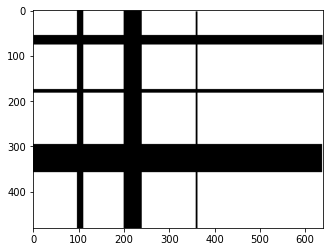

In [11]:
# Setup the sample image file paths
a_file_name = 'imgs/testy-grid.png'
nd_array_uint8_HWC1 = mx.image.imread(a_file_name, flag=0)
print('nd_array_uint8_HWC1.shape = ', nd_array_uint8_HWC1.shape)
np_array = nd_array_uint8_HWC1.asnumpy()
nd_array_f32_HWC1 = nd_array_uint8_HWC1.astype("float32")
nd_array_f3201_HWC1 = nd_array_f32_HWC1/255
print('nd_array_f3201_HWC1.shape = ', nd_array_f3201_HWC1.shape)
nd_array_f3201_HW = nd_array_f3201_HWC1[:,:,0]  # this makes a shape like (y,x)
print('nd_array_f3201_HW.shape = ', nd_array_f3201_HW.shape)
np_array_f3201_HW = nd_array_f3201_HW.asnumpy()
plt.imshow(np_array_f3201_HW, cmap='gray')

# Subset the image

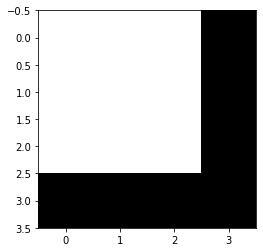

In [12]:
subset_nd_array_f3201_HW = nd_array_f3201_HW[52:56,94:98]
subset_np_array_f3201_HW = subset_nd_array_f3201_HW.asnumpy()
plt.imshow(subset_np_array_f3201_HW, cmap='gray')

# Iterate the pixels

A couple of links found

* https://mxnet.apache.org/versions/1.5.0/api/python/io/io.html
* https://mxnet.apache.org/versions/1.1.0/tutorials/basic/data.html
* https://mxnet.apache.org/versions/1.5.0/tutorials/basic/data.html
* https://mxnet.apache.org/versions/0.11.0/tutorials/r/CustomIteratorTutorial.html

Nothing to do with iterators, but it looks interesting for beginners

* https://mxnet.apache.org/versions/1.1.0/tutorials/basic/ndarray.html

A book, what is Julia?  It shows some mxnet.

* https://books.google.com/books?id=JMNiDwAAQBAJ&pg=PA147&lpg=PA147&dq=iterate+mxnet+iterate+a+matrix&source=bl&ots=8tWjjWCzsz&sig=ACfU3U3967qA3cNGQjQxuSoACFgRySqBhA&hl=en&sa=X&ved=2ahUKEwihrNXzsof2AhW1GDQIHVogD4YQ6AF6BAgREAM#v=onepage&q=iterate%20mxnet%20iterate%20a%20matrix&f=false

A channel RGB only image based iterator

* https://mxnet.apache.org/versions/1.5.0/api/python/image/image.html#mxnet.image.ImageIter

Finally one which looks appropriate

* https://mxnet.apache.org/versions/1.6/api/python/docs/api/ndarray/ndarray.html#mxnet.ndarray.broadcast_mul
* https://mxnet.incubator.apache.org/api/faq/new_op
* https://mxnet.apache.org/versions/1.1.0/api/python/io/io.html#mxnet.io.NDArrayIter


In [13]:
subset_nd_array_f3201_HW


[[1.         1.         1.         0.01176471]
 [1.         1.         1.         0.01176471]
 [1.         1.         1.         0.01176471]
 [0.01176471 0.01176471 0.01176471 0.01176471]]
<NDArray 4x4 @cpu(0)>

# Iteration routines

## Numpy NDArrayIter

I found this via stackoverflow.  Not really interested in it though.  I want to stick with MXNet/NDArray API.

In [14]:
a = np.arange(1,9).reshape(2,4)
b = -a
 
it = np.nditer((a, b), order='C', flags=('multi_index',))
for i, j in it:
    print(it.multi_index, i, j)

(0, 0) 1 -1
(0, 1) 2 -2
(0, 2) 3 -3
(0, 3) 4 -4
(1, 0) 5 -5
(1, 1) 6 -6
(1, 2) 7 -7
(1, 3) 8 -8


## NDArrayIter


[docs](https://mxnet.apache.org/versions/1.6/api/python/docs/api/mxnet/io/index.html#mxnet.io.NDArrayIter)

```
mxnet.io.NDArrayIter(data, 
                     label=None, 
                     batch_size=1, 
                     shuffle=False, 
                     last_batch_handle='pad', 
                     data_name='data', 
                     label_name='softmax_label')
```

In [15]:
# batch 1
data = np.arange(16).reshape((1,4,4))
print('data is ', data)
labels = np.ones([1, 1])
dataiter = mx.io.NDArrayIter(data, labels, 1, False, last_batch_handle='discard')
for batch in dataiter:
    print('loop entry')
    #print ('batch.data[0] = ', batch.data[0].asnumpy())
    print ('batch.data[0] = ', batch.data[0].asnumpy())
    print ('batch.data[0].shape = ', batch.data[0].shape)

data is  [[[ 0  1  2  3]
  [ 4  5  6  7]
  [ 8  9 10 11]
  [12 13 14 15]]]
loop entry
batch.data[0] =  [[[ 0.  1.  2.  3.]
  [ 4.  5.  6.  7.]
  [ 8.  9. 10. 11.]
  [12. 13. 14. 15.]]]
batch.data[0].shape =  (1, 4, 4)


In [16]:
# batch 3
data = np.arange(40).reshape((10,2,2))
labels = np.ones([10, 1])
dataiter = mx.io.NDArrayIter(data, labels, 3, True, last_batch_handle='discard')
for batch in dataiter:
    print('loop entry')
    print (batch.data[0].asnumpy())
    print (batch.data[0].shape)

loop entry
[[[12. 13.]
  [14. 15.]]

 [[32. 33.]
  [34. 35.]]

 [[ 0.  1.]
  [ 2.  3.]]]
(3, 2, 2)
loop entry
[[[ 4.  5.]
  [ 6.  7.]]

 [[28. 29.]
  [30. 31.]]

 [[24. 25.]
  [26. 27.]]]
(3, 2, 2)
loop entry
[[[ 8.  9.]
  [10. 11.]]

 [[16. 17.]
  [18. 19.]]

 [[20. 21.]
  [22. 23.]]]
(3, 2, 2)


## NDArray Broadcast Multiply

[docs](https://mxnet.apache.org/versions/master/api/python/docs/api/legacy/ndarray/ndarray.html#mxnet.ndarray.broadcast_mul)



In [17]:
# mxnet.ndarray.broadcast_mul(lhs=None, rhs=None, out=None, name=None, **kwargs)

# This is a good choice for submititing a patch

#
# x = [[ 1.,  1.,  1.],
#      [ 1.,  1.,  1.]]
# 
# y = [[ 0.],
#     [ 1.]]
#
#mx.nd.broadcast_mul(x, y) = [[ 0.,  0.,  0.],
#                            [ 1.,  1.,  1.]]


x = nd.array([[ 1.,  1.,  1.],[ 1.,  1.,  1.]])
print('x is ', x)
y = nd.array([[ 0.],[ 1.]])
print('y is ', y)
z = mx.ndarray.broadcast_mul(x, y)
print ('z is ', z)

x is  
[[1. 1. 1.]
 [1. 1. 1.]]
<NDArray 2x3 @cpu(0)>
y is  
[[0.]
 [1.]]
<NDArray 2x1 @cpu(0)>
z is  
[[0. 0. 0.]
 [1. 1. 1.]]
<NDArray 2x3 @cpu(0)>


# array indexes

[docs](https://mxnet.apache.org/versions/master/api/python/docs/api/legacy/ndarray/contrib/index.html#mxnet.ndarray.contrib.index_array)

```
index_array(data=None, 
            axes=_Null, 
            out=None, 
            name=None, 
            **kwargs)
```

#### index_array ex 1

In [18]:
x = mx.nd.ones((3, 2))

mx.nd.contrib.index_array(x)


[[[0 0]
  [0 1]]

 [[1 0]
  [1 1]]

 [[2 0]
  [2 1]]]
<NDArray 3x2x2 @cpu(0)>

#### index_array ex 2

In [19]:
x = mx.nd.ones((3, 2, 2))

mx.nd.contrib.index_array(x, axes=(1, 0))


[[[[0 0]
   [0 0]]

  [[1 0]
   [1 0]]]


 [[[0 1]
   [0 1]]

  [[1 1]
   [1 1]]]


 [[[0 2]
   [0 2]]

  [[1 2]
   [1 2]]]]
<NDArray 3x2x2x2 @cpu(0)>

# index_copy

[docs](https://mxnet.apache.org/versions/master/api/python/docs/api/contrib/ndarray/index.html#mxnet.contrib.ndarray.index_copy)


```
index_copy(old_tensor=None, 
           index_vector=None, 
           new_tensor=None, 
           out=None, 
           name=None, 
           **kwargs)
```

I've learned a little more about this api.  I've elaborated on the example below.


In [20]:
x = mx.nd.zeros((5,3))
index = mx.nd.array([0,4,2])
t = mx.nd.array([[1,2,3],[4,5,6],[7,8,9]])

mx.nd.contrib.index_copy(x, index, t)


[[1. 2. 3.]
 [0. 0. 0.]
 [7. 8. 9.]
 [0. 0. 0.]
 [4. 5. 6.]]
<NDArray 5x3 @cpu(0)>

####  A better example of this api

In [21]:
template_tensor = nd.zeros([5,3])
template_tensor


[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
<NDArray 5x3 @cpu(0)>

In [22]:
source_indices = nd.array([0,2,4])
source_indices


[0. 2. 4.]
<NDArray 3 @cpu(0)>

In [23]:
source_tensor = nd.array([[0,1,2],[3,4,5],[6,7,8]])
source_tensor


[[0. 1. 2.]
 [3. 4. 5.]
 [6. 7. 8.]]
<NDArray 3x3 @cpu(0)>

This api uses the src_indices to specify which elements to copy from the source tensor to output.  The output uses
the template tensor for unspecified values misssing from the src_indices array.

In [24]:
nd.contrib.index_copy(template_tensor, source_indices, source_tensor)


[[0. 1. 2.]
 [0. 0. 0.]
 [3. 4. 5.]
 [0. 0. 0.]
 [6. 7. 8.]]
<NDArray 5x3 @cpu(0)>

Doing again using the named parameter form

In [25]:
out_tensor = nd.ones([5,3])*9 # testing the out parameter with all nines

nd.contrib.index_copy(old_tensor=template_tensor,  # old_tensor is confusing  
           index_vector=source_indices,            # index_vector is not as confusing, but not clear 
           new_tensor=source_tensor,               # new_tensor is confusing.  Its not new nor is it modifed. 
           out=out_tensor,                         # using out paramter as foo, since not sure what it is ...
           name=None,)


[[0. 1. 2.]
 [0. 0. 0.]
 [3. 4. 5.]
 [0. 0. 0.]
 [6. 7. 8.]]
<NDArray 5x3 @cpu(0)>

In [26]:
# Hmm, this shows that out_tensor is the name of the output.  So, what happens is
# all the values from the template_tensor is copied to the output, with the exception
# of the rows specified by the index_vector.  In that case, the values in the new_tensor
# are are copied to output
out_tensor


[[0. 1. 2.]
 [0. 0. 0.]
 [3. 4. 5.]
 [0. 0. 0.]
 [6. 7. 8.]]
<NDArray 5x3 @cpu(0)>

## Testing to rotate the images

In [100]:
# batch 1
in_data = nd.arange(4).reshape((1,2,2))
print('in_data is ', in_data)

in_data is  
[[[0. 1.]
  [2. 3.]]]
<NDArray 1x2x2 @cpu(0)>


In [101]:
# setup an ouptut array with all nines, so I can see overwrites with new values
out_data = nd.ones(4).reshape((2,2))*9
# out_data also needs to be in batch form
out_data = nd.expand_dims(out_data, axis=0)
print('out_data is ', out_data)

out_data is  
[[[9. 9.]
  [9. 9.]]]
<NDArray 1x2x2 @cpu(0)>


In [102]:
# setup a rotation matrix
rotate_data = rotate_90
print('rotate_90 ', rotate_data)

rotate_90  
[[ 6.123234e-17 -1.000000e+00]
 [ 1.000000e+00  6.123234e-17]]
<NDArray 2x2 @cpu(0)>


In [104]:
# NDArrayIter(data, label=None, batch_size=1, shuffle=False, 
#            last_batch_handle='pad', data_name='data', 
#            label_name='softmax_label')
#
# Ignore the label parameter.
dataiter = mx.io.NDArrayIter(in_data, batch_size=1, shuffle=False, last_batch_handle='discard')
#batch_index = [0]
for batch in dataiter:
    print('loop entry - a single batch - a single image in batch.data[0] from what is in in_data')
    #print ('batch.data[0] = ', batch.data[0].asnumpy())
    #print ('batch.data[0].shape = ', batch.data[0].shape)
    # Does this copy or get an alias to the input image?
    input_img = batch.data[0]
    #print ('input_img = ', input_img.asnumpy())
    print ('input_img.shape = ', input_img.shape)
    
    # this will print the axis including the batch axis
    # print('indicies are ', mx.nd.contrib.index_array(entire_img) )
    # this will print the x,y axis and ignore the batch
    input_img_indexes = mx.nd.contrib.index_array(input_img, axes=(1, 2))
    print('indexes are: ', input_img_indexes)
    print ('input_img_indexes.shape = ', input_img_indexes.shape)
    
    
    # copy data from input to output
    # Note, this seems to also use the batch axis?  Its shape (1,2,2)
    #out_data = input_img
    
    # Try to assign input data to output data based upon indicies
    orig_indexes = mx.nd.reshape(input_img_indexes, shape=(4,2))
    print('new_indexes ', new_indexes)
    orig_indexes = orig_indexes.astype("float32")
    
    # I've seen one variant where matrix-matrix multiply 
    # is done with .T.  why?
    new_indexes = nd.dot(orig_indexes, rotate_data) 
    #print('result = ', result)
    new_indexes = new_indexes.astype('int64')
    print('new_indexes = ', new_indexes)
    new_indexes = new_indexes + nd.array(nd.array([0, 1])).astype('int64')
    print('new_indexes after shift to positive', new_indexes)
    
    
    
    
    

loop entry - a single batch - a single image in batch.data[0] from what is in in_data
input_img.shape =  (1, 2, 2)
indexes are:  
[[[[0 0]
   [0 1]]

  [[1 0]
   [1 1]]]]
<NDArray 1x2x2x2 @cpu(0)>
input_img_indexes.shape =  (1, 2, 2, 2)
new_indexes  
[[0 1]
 [1 1]
 [0 0]
 [1 0]]
<NDArray 4x2 @cpu(0)>
new_indexes =  
[[ 0  0]
 [ 1  0]
 [ 0 -1]
 [ 1 -1]]
<NDArray 4x2 @cpu(0)>
new_indexes after shift to positive 
[[0 1]
 [1 1]
 [0 0]
 [1 0]]
<NDArray 4x2 @cpu(0)>


In [31]:
print('out_data is ', out_data)
print('in_data is ', in_data)
print('rotate_data is ', rotate_data)
print('orig_indexes is ', orig_indexes)
print('new_indexes is ', new_indexes)
print('new_indexes.dtype is ', new_indexes.dtype)

out_data is  
[[[9. 9.]
  [9. 9.]]]
<NDArray 1x2x2 @cpu(0)>
in_data is  
[[[0. 1.]
  [2. 3.]]]
<NDArray 1x2x2 @cpu(0)>
rotate_data is  
[[ 6.123234e-17 -1.000000e+00]
 [ 1.000000e+00  6.123234e-17]]
<NDArray 2x2 @cpu(0)>
orig_indexes is  
[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
<NDArray 4x2 @cpu(0)>
new_indexes is  
[[0 1]
 [1 1]
 [0 0]
 [1 0]]
<NDArray 4x2 @cpu(0)>
new_indexes.dtype is  <class 'numpy.int64'>


# rewriting to match notes

To avoid the batch dimension, and simply problem

In [32]:
orig_image = in_data[0]
print('orig_image ', orig_image)

orig_image  
[[0. 1.]
 [2. 3.]]
<NDArray 2x2 @cpu(0)>


In [33]:
rotated_image=out_data[0]
print('rotated_image', rotated_image)

rotated_image 
[[9. 9.]
 [9. 9.]]
<NDArray 2x2 @cpu(0)>


In [34]:
print('orig_indexes', orig_indexes)

orig_indexes 
[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
<NDArray 4x2 @cpu(0)>


In [35]:
print('new_indexes', new_indexes)

new_indexes 
[[0 1]
 [1 1]
 [0 0]
 [1 0]]
<NDArray 4x2 @cpu(0)>


#### do pixel 0,0

In [36]:
orig_indexes[0,0]  # row 0, column 0 = the first row index is in the first row column 0


[0.]
<NDArray 1 @cpu(0)>

In [37]:
new_indexes[0,1] # row 0, column 1


[1]
<NDArray 1 @cpu(0)>

In [38]:
orig_image[new_indexes[0,0], new_indexes[0,1]]  # the new 0,0 pixel should be nine, pulled from 1,1


[1.]
<NDArray 1 @cpu(0)>

In [39]:
# Did a 1 move ot pixel 0,0?
rotated_image[orig_indexes[0,0], orig_indexes[0,1]] = orig_image[new_indexes[0,0], new_indexes[0,1]]
rotated_image


[[1. 9.]
 [9. 9.]]
<NDArray 2x2 @cpu(0)>

#### do pixel 0,1

In [40]:
rotated_image[orig_indexes[1,0], orig_indexes[1,1]] = orig_image[new_indexes[1,0], new_indexes[1,1]]
rotated_image


[[1. 3.]
 [9. 9.]]
<NDArray 2x2 @cpu(0)>

#### do pixel 1,0

In [41]:
rotated_image[orig_indexes[2,0], orig_indexes[2,1]] = orig_image[new_indexes[2,0], new_indexes[2,1]]
rotated_image


[[1. 3.]
 [0. 9.]]
<NDArray 2x2 @cpu(0)>

#### do pixel 1,1

In [42]:
rotated_image[orig_indexes[3,0], orig_indexes[3,1]] = orig_image[new_indexes[3,0], new_indexes[3,1]]
rotated_image


[[1. 3.]
 [0. 2.]]
<NDArray 2x2 @cpu(0)>

# Is that rotated 90?

In [43]:
print('orig image', orig_image)
print('rotated_image', rotated_image)

orig image 
[[0. 1.]
 [2. 3.]]
<NDArray 2x2 @cpu(0)>
rotated_image 
[[1. 3.]
 [0. 2.]]
<NDArray 2x2 @cpu(0)>


# Looks like it to me.  I call that success, but not DFD success

## How to do this implicitly?

In [44]:
orig_image[new_indexes] # nope


[[[0. 1.]
  [2. 3.]]

 [[2. 3.]
  [2. 3.]]

 [[0. 1.]
  [0. 1.]]

 [[2. 3.]
  [0. 1.]]]
<NDArray 4x2x2 @cpu(0)>

# this looks promising

In [56]:
# reset rotated_image
# setup an ouptut array with all nines, so I can see overwrites with new values
out_data = nd.ones(4).reshape((2,2))*9
# out_data also needs to be in batch form
out_data = nd.expand_dims(out_data, axis=0)
#print('out_data is ', out_data)
rotated_image=out_data[0]
print('rotated_image', rotated_image)

rotated_image 
[[9. 9.]
 [9. 9.]]
<NDArray 2x2 @cpu(0)>


In [59]:
rotated_image = orig_image[new_indexes[:,0],new_indexes[:,1]]
rotated_image


[1. 3. 0. 2.]
<NDArray 4 @cpu(0)>

In [60]:
rotated_image.reshape(2,2)


[[1. 3.]
 [0. 2.]]
<NDArray 2x2 @cpu(0)>

# another try with a 3x3

In [165]:
# batch 1
in_data = nd.arange(9).reshape((1,3,3))
print('in_data is ', in_data)

in_data is  
[[[0. 1. 2.]
  [3. 4. 5.]
  [6. 7. 8.]]]
<NDArray 1x3x3 @cpu(0)>


In [166]:
# setup an ouptut array with all nines, so I can see overwrites with new values
out_data = nd.ones(9).reshape((3,3))*9
# out_data also needs to be in batch form
out_data = nd.expand_dims(out_data, axis=0)
print('out_data is ', out_data)
rotated_image=out_data[0]
print('rotated_image', rotated_image)

out_data is  
[[[9. 9. 9.]
  [9. 9. 9.]
  [9. 9. 9.]]]
<NDArray 1x3x3 @cpu(0)>
rotated_image 
[[9. 9. 9.]
 [9. 9. 9.]
 [9. 9. 9.]]
<NDArray 3x3 @cpu(0)>


In [167]:
# setup a rotation matrix
rotate_data = rotate_90
print('rotate_90 ', rotate_data)

rotate_90  
[[ 6.123234e-17 -1.000000e+00]
 [ 1.000000e+00  6.123234e-17]]
<NDArray 2x2 @cpu(0)>


In [168]:
# NDArrayIter(data, label=None, batch_size=1, shuffle=False, 
#            last_batch_handle='pad', data_name='data', 
#            label_name='softmax_label')
#
# Ignore the label parameter.
dataiter = mx.io.NDArrayIter(in_data, batch_size=1, shuffle=False, last_batch_handle='discard')
#batch_index = [0]
for batch in dataiter:
    
    print('loop entry - a single batch - a single image in batch.data[0] from what is in in_data')
    #print ('batch.data[0] = ', batch.data[0].asnumpy())
    #print ('batch.data[0].shape = ', batch.data[0].shape)
    # Does this copy or get an alias to the input image?
    input_img = batch.data[0]
    #print ('input_img = ', input_img.asnumpy())
    print ('input_img.shape = ', input_img.shape)
    
    # this will print the axis including the batch axis
    # print('indicies are ', mx.nd.contrib.index_array(entire_img) )
    # this will print the x,y axis and ignore the batch
    input_img_indexes = mx.nd.contrib.index_array(input_img, axes=(1, 2))
    print('indexes are: ', input_img_indexes)
    print ('input_img_indexes.shape = ', input_img_indexes.shape)
    
    
    
    # Try to assign input data to output data based upon indicies
    orig_indexes = mx.nd.reshape(input_img_indexes, shape=(9,2))
    print('orig_indexes ', orig_indexes)
    orig_indexes = orig_indexes.astype("float32")
    
    # I've seen one variant where matrix-matrix multiply 
    # is done with .T.  why?
    new_indexes = nd.dot(orig_indexes, rotate_data) 
    print('new_indexes = ', new_indexes)
    new_indexes = new_indexes.astype('int64')
    print('new_indexes = ', new_indexes)
    new_indexes = new_indexes + nd.array(nd.array([0, 2])).astype('int64')
    print('new_indexes after shift to positive', new_indexes)

    print('rotated_image ', rotated_image)
    print('rotated_image.shape ', rotated_image.shape)
    rotated_image = orig_image[new_indexes[:,0],new_indexes[:,1]]
    print('rotated_image ', rotated_image)
    

loop entry - a single batch - a single image in batch.data[0] from what is in in_data
input_img.shape =  (1, 3, 3)
indexes are:  
[[[[0 0]
   [0 1]
   [0 2]]

  [[1 0]
   [1 1]
   [1 2]]

  [[2 0]
   [2 1]
   [2 2]]]]
<NDArray 1x3x3x2 @cpu(0)>
input_img_indexes.shape =  (1, 3, 3, 2)
orig_indexes  
[[0 0]
 [0 1]
 [0 2]
 [1 0]
 [1 1]
 [1 2]
 [2 0]
 [2 1]
 [2 2]]
<NDArray 9x2 @cpu(0)>
new_indexes =  
[[ 0.0000000e+00  0.0000000e+00]
 [ 1.0000000e+00  6.1232343e-17]
 [ 2.0000000e+00  1.2246469e-16]
 [ 6.1232343e-17 -1.0000000e+00]
 [ 1.0000000e+00 -1.0000000e+00]
 [ 2.0000000e+00 -1.0000000e+00]
 [ 1.2246469e-16 -2.0000000e+00]
 [ 1.0000000e+00 -2.0000000e+00]
 [ 2.0000000e+00 -2.0000000e+00]]
<NDArray 9x2 @cpu(0)>
new_indexes =  
[[ 0  0]
 [ 1  0]
 [ 2  0]
 [ 0 -1]
 [ 1 -1]
 [ 2 -1]
 [ 0 -2]
 [ 1 -2]
 [ 2 -2]]
<NDArray 9x2 @cpu(0)>
new_indexes after shift to positive 
[[0 2]
 [1 2]
 [2 2]
 [0 1]
 [1 1]
 [2 1]
 [0 0]
 [1 0]
 [2 0]]
<NDArray 9x2 @cpu(0)>
rotated_image  
[[9. 9. 9.]
 [9. 9. 

IndexError: Traceback (most recent call last):
  File "../src/operator/tensor/indexing_op.cc", line 454
IndexError: index 2 is out of bounds for axis 0 with size 2

### Hmm, try this contrib api again

In [45]:
# for reference
x = mx.nd.zeros((5,3))
t = mx.nd.array([[1,2,3],[4,5,6],[7,8,9]])
index = mx.nd.array([0,4,2])  # <--- this is interesting. It has a zero length axes?????
# x is a template for output
# index is the indexes?
# t is "new_tensor?", its the source tensor?
mx.nd.contrib.index_copy(x, index, t)


[[1. 2. 3.]
 [0. 0. 0.]
 [7. 8. 9.]
 [0. 0. 0.]
 [4. 5. 6.]]
<NDArray 5x3 @cpu(0)>

In [46]:
# hmm, the t has three axis specification. perhaps it requires a batch parameter?
index


[0. 4. 2.]
<NDArray 3 @cpu(0)>

In [47]:
# Did x change? No, it is just a template for output array?
x


[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
<NDArray 5x3 @cpu(0)>

In [48]:
template_img = nd.zeros([2,2])
template_img_batch = nd.expand_dims(template_img, axis=0)
template_img_batch


[[[0. 0.]
  [0. 0.]]]
<NDArray 1x2x2 @cpu(0)>

In [49]:
# this is the wrong shape.  It gives an error. possibly due to the lack of batch
new_indexes


[[0 1]
 [1 1]
 [0 0]
 [1 0]]
<NDArray 4x2 @cpu(0)>

In [50]:
new_indexes_batch = nd.expand_dims(new_indexes, axis=0)
new_indexes_batch


[[[0 1]
  [1 1]
  [0 0]
  [1 0]]]
<NDArray 1x4x2 @cpu(0)>

In [51]:
# perhaps the orignal image also needs a batch?
orig_image_batch = nd.expand_dims(orig_image, axis=0)
orig_image_batch


[[[0. 1.]
  [2. 3.]]]
<NDArray 1x2x2 @cpu(0)>

In [52]:
# Hmm. adding back batch dims? Or running in circles of confusion?
print('orig_image_batch.shape = ', orig_image_batch.shape )
print('new_indexes_batch.shape = ', new_indexes_batch.shape )
print('template_img_batch.shape = ', template_img_batch.shape )

orig_image_batch.shape =  (1, 2, 2)
new_indexes_batch.shape =  (1, 4, 2)
template_img_batch.shape =  (1, 2, 2)


In [53]:
# mx.nd.contrib.index_copy(template_img, new_indexes, orig_image_batch)
# mx.nd.contrib.index_copy(template_img, new_indexes_batch, orig_image_batch)
#mx.nd.contrib.index_copy(template_img_batch, new_indexes_batch, orig_image_batch)
# best guess at the api, would be
# * template img is not batched, but it is three columns?
# * 
mx.nd.contrib.index_copy(template_img, new_indexes_batch, orig_image_batch)

MXNetError: Traceback (most recent call last):
  File "../src/operator/contrib/./index_copy-inl.h", line 64
MXNetError: Check failed: in_attrs->at(1).ndim() == 1 (3 vs. 1) : 

In [ ]:
orig_indexes

In [ ]:
in_data[0]

In [ ]:
in_data[0,1]

In [ ]:
orig_indexes

In [ ]:
a = np.arange(50).reshape(10, 5) # Array to be indexed
# b = 9 7 5 3 1  which means start with row 9 and step down to 
b = np.arange(9, -1, -2) # Indexing array. Start at 9, step down by 2 each time until 1
print('a = ', a)
print('b (indexing) = ', b)
result = a[b, np.arange(a.shape[1])]
print('result = ', result)

In [ ]:
out_data[0] = in_data[0,new_indexes]
print('out_data is ', out_data)

In [ ]:
out_data[0,new_indexes] = in_data
print('out_data is ', out_data)

In [ ]:
a = nd.arange(50).reshape(10, 5) # Array to be indexed
b = nd.arange(9, -1, -2) # Indexing array
print('a = ', a)
print('b (indexing) = ', b)
result = a[b, nd.arange(a.shape[1])]
print('result = ', result)

In [ ]:
out_data[new_indexes]

In [ ]:
new_indexes

In [ ]:
new_indexes[:,0], new_indexes[:,1]

In [ ]:
out_data[ 0, new_indexes[:,0]: , new_indexes[:,1]: ]

In [ ]:
out_data[0, 0-2:, :]

In [ ]:
out_data[0, np.array([0,1,2]):, :]

In [ ]:
# x = mx.nd.zeros((5,3))
# t = mx.nd.array([[1,2,3],[4,5,6],[7,8,9]])
# index = mx.nd.array([0,4,2])

mx.nd.contrib.index_copy(out_data[0], new_indexes, in_data[0])

In [ ]:
out_data[0]

In [ ]:
in_data[0]

In [ ]:
new_indexes

In [ ]:
out_data[0,new_indexes[0,0],0]